# COMP47590 Advanced Machine Learning
# MLPs in Keras

Create a simple feed forward network using keras

In [29]:
import pandas as pd
import numpy as np
import random

from IPython.display import display, HTML, Image
from IPython.display import SVG

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical

import gradio as gr

## Dataset Pre-Processing

In [2]:
file_name = 'mnist_train_small.csv'
target_feature = "value"
num_classes = 10
classes = {0: "0", 1:"1", 2: "2", 3:"3", 4:"4", 5:"5", 6:"6", 7:"7", 8:"8", 9:"9"}

Read in a dataset

In [3]:
abt = pd.read_csv(file_name, encoding = "ISO-8859-1")

In [4]:
abt.head()

,value,X0,X0.1,X0.2,X0.3,X0.4,X0.5,X0.6,X0.7,X0.8,...,X0.608,X0.609,X0.610,X0.611,X0.612,X0.613,X0.614,X0.615,X0.616,X0.617
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Put all but the target variable into the descriptive features array
X = abt.drop([target_feature], axis = 1)
Y = abt[target_feature]

# Use a range scaling to scale all variables to between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler((-1,1))
cols = X.columns
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns = cols) # Watch out for putting back in columns here

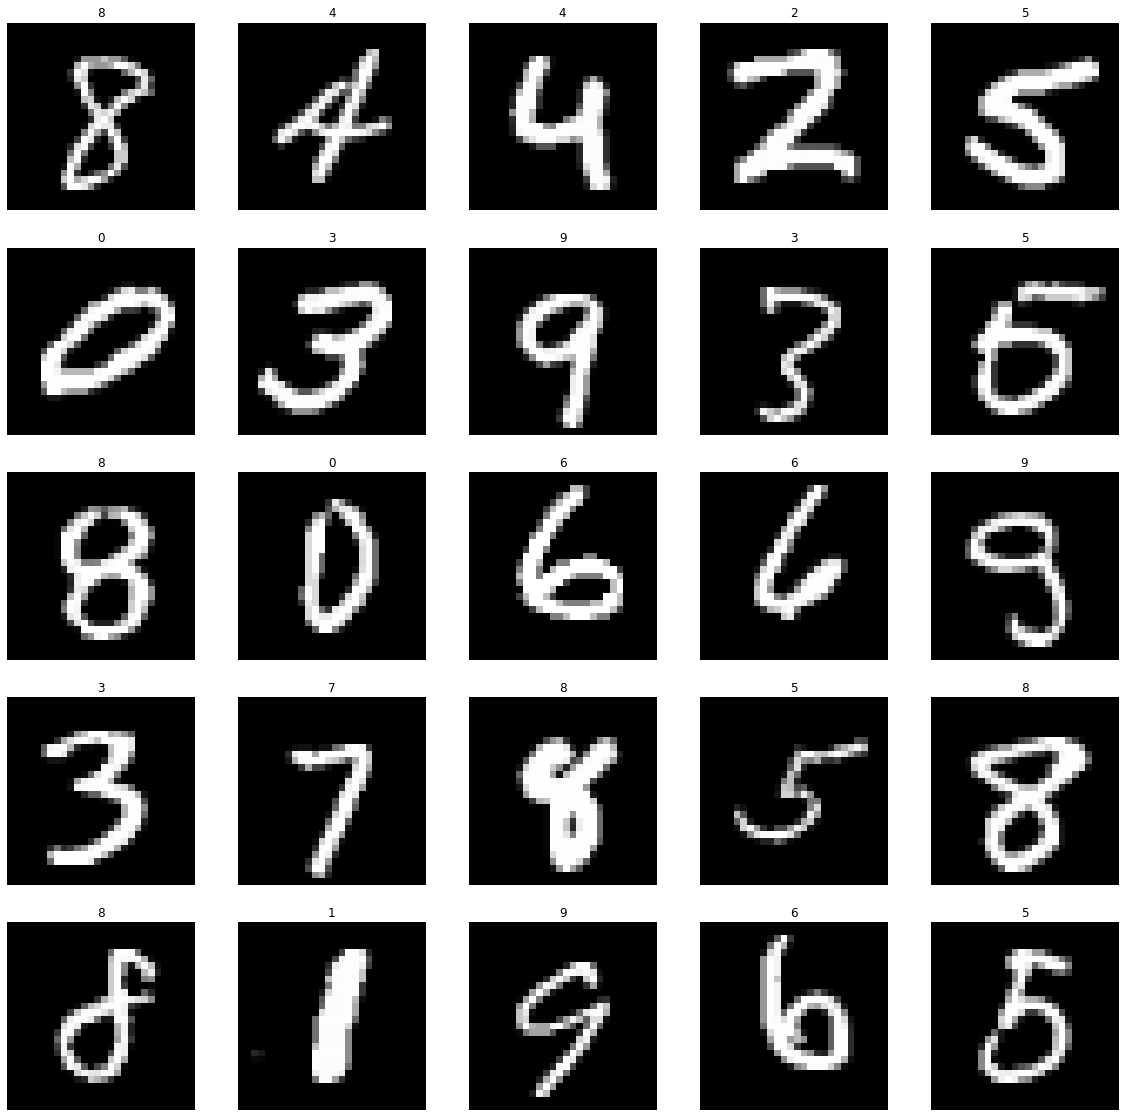

In [6]:
pltsize=4
row_images = 5
col_images = 5
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    i_rand = random.randint(0, X.shape[0])
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow((X.iloc[i_rand]).values.reshape(28,28), cmap='gray', vmin=-1, vmax=1)
    plt.title((str(classes[Y[i_rand]])))
    # print('Training sample',i_rand,': class:',y_train[i_rand])

In [7]:
X_train_plus_valid, X_test, y_train_plus_valid, y_test = train_test_split(X, Y, random_state=0, test_size = 0.30, train_size = 0.7)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_plus_valid, y_train_plus_valid, random_state=0, test_size = 0.199/0.7, train_size = 0.5/0.7)

In [8]:
Y

0       9
1       0
2       1
3       7
4       4
       ..
9995    3
9996    1
9997    2
9998    2
9999    6
Name: value, Length: 10000, dtype: int64

In [9]:
# Convert the singl column label into a dummy coded label
y_train_wide = to_categorical(np.asarray(y_train))
y_valid_wide = to_categorical(np.asarray(y_valid))

In [10]:
y_train_wide[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## Model Building

Specfiy the structure of the neural network model

In [11]:
y_train_wide.shape[1]

10

In [12]:
model = Sequential()

model.add(Dense(input_dim=X_train.shape[1], units=512, activation="sigmoid"))

model.add(Dense(units=207, activation="sigmoid"))

model.add(Dense(units=102, activation="sigmoid"))

model.add(Dense(units=y_train_wide.shape[1], activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 207)               106191    
                                                                 
 dense_2 (Dense)             (None, 102)               21216     
                                                                 
 dense_3 (Dense)             (None, 10)                1030      
                                                                 
Total params: 530,357
Trainable params: 530,357
Non-trainable params: 0
_________________________________________________________________


Specify the parameters of the model optimisation process

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [14]:
history = model.fit(np.asfarray(X_train), np.asfarray(y_train_wide), \
          epochs=20, batch_size=32, verbose=1, \
          validation_data=(np.asfarray(X_valid), np.asfarray(y_valid_wide)))

Epoch 1/20
157/157 [==============================] - 1s 5ms/step - loss: 1.2956 - accuracy: 0.6148 - val_loss: 0.7678 - val_accuracy: 0.7690
Epoch 2/20
157/157 [==============================] - 1s 5ms/step - loss: 0.5555 - accuracy: 0.8490 - val_loss: 0.4197 - val_accuracy: 0.8860
Epoch 3/20
157/157 [==============================] - 1s 5ms/step - loss: 0.4038 - accuracy: 0.8818 - val_loss: 0.4538 - val_accuracy: 0.8649
Epoch 4/20
157/157 [==============================] - 1s 6ms/step - loss: 0.3319 - accuracy: 0.9014 - val_loss: 0.3635 - val_accuracy: 0.8910
Epoch 5/20
157/157 [==============================] - 1s 5ms/step - loss: 0.2796 - accuracy: 0.9180 - val_loss: 0.4252 - val_accuracy: 0.8734
Epoch 6/20
157/157 [==============================] - 1s 6ms/step - loss: 0.2469 - accuracy: 0.9274 - val_loss: 0.3342 - val_accuracy: 0.8970
Epoch 7/20
157/157 [==============================] - 1s 6ms/step - loss: 0.2067 - accuracy: 0.9388 - val_loss: 0.2651 - val_accuracy: 0.9216
Epoch 

Plot learning curves showing accuracy

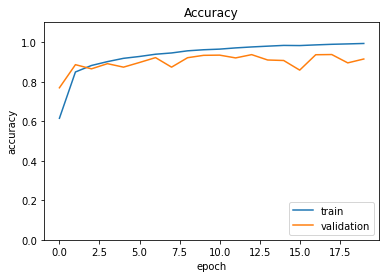

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.ylim((0, 1.1))
plt.show()

Plot learning curves showing loss

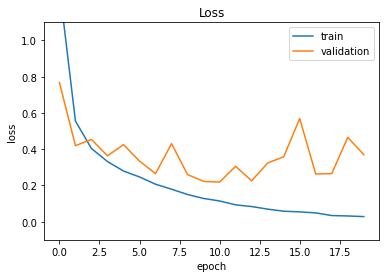

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.ylim((-0.1, 1.1))
plt.show()

Evaluate the model

In [18]:
print("******** Training Data ********")
# Make a set of predictions for the training data
y_pred = model.predict(np.asfarray(X_train))
y_pred = np.argmax(y_pred,axis=1)

# Print performance details
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))



print("****** Validation Data ********")

# Make a set of predictions for the validation data
y_pred = model.predict(np.asfarray(X_valid))
y_pred = np.argmax(y_pred,axis=1)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

print("****** Test Data ********")

# Make a set of predictions for the validation data
y_pred = model.predict(np.asfarray(X_test))
y_pred = np.argmax(y_pred,axis=1)

# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

******** Training Data ********
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       520
           1       1.00      0.99      1.00       568
           2       1.00      0.99      0.99       450
           3       1.00      1.00      1.00       513
           4       0.99      0.85      0.92       466
           5       0.99      1.00      1.00       455
           6       1.00      0.96      0.98       479
           7       0.99      1.00      1.00       550
           8       0.97      1.00      0.99       496
           9       0.88      1.00      0.93       503

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,520,0,0,0,0,0,0,0,0,0,520
1,0,564,0,0,0,0,0,2,1,1,568
2,0,0,445,2,1,0,0,0,2,0,450
3,0,0,0,512,0,0,0,0,1,0,513
4,1,0,0,0,398,0,0,0,1,66,466
5,0,0,0,0,0,455,0,0,0,0,455
6,6,1,0,0,0,3,460,0,8,1,479
7,0,0,0,0,1,0,0,549,0,0,550
8,0,0,0,0,0,0,0,0,496,0,496


****** Validation Data ********
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       221
           1       0.97      0.94      0.95       222
           2       0.97      0.90      0.93       195
           3       0.92      0.92      0.92       201
           4       0.96      0.76      0.85       187
           5       0.92      0.88      0.90       190
           6       0.99      0.89      0.94       197
           7       0.96      0.96      0.96       203
           8       0.82      0.95      0.88       198
           9       0.74      0.97      0.84       177

    accuracy                           0.91      1991
   macro avg       0.92      0.91      0.91      1991
weighted avg       0.92      0.91      0.92      1991

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,216,0,0,0,0,0,0,0,3,2,221
1,0,208,1,4,0,0,0,2,4,3,222
2,2,1,175,4,2,1,0,1,6,3,195
3,0,1,1,184,0,3,1,0,8,3,201
4,1,0,1,0,142,1,0,0,4,38,187
5,3,1,0,4,0,168,0,2,5,7,190
6,4,0,0,0,0,7,175,0,11,0,197
7,1,1,1,0,1,1,0,194,1,3,203
8,0,1,0,3,2,1,0,2,188,1,198


****** Test Data ********
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       289
           1       0.99      0.97      0.98       355
           2       0.97      0.87      0.92       303
           3       0.95      0.93      0.94       303
           4       0.96      0.80      0.87       269
           5       0.93      0.92      0.92       286
           6       0.99      0.88      0.93       310
           7       0.97      0.95      0.96       299
           8       0.79      0.98      0.88       287
           9       0.81      0.95      0.87       299

    accuracy                           0.92      3000
   macro avg       0.93      0.92      0.92      3000
weighted avg       0.93      0.92      0.92      3000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,276,0,0,0,0,4,0,0,6,3,289
1,0,345,0,1,0,0,0,0,8,1,355
2,3,3,263,8,1,2,1,2,18,2,303
3,0,0,1,281,0,8,0,3,5,5,303
4,1,1,0,0,215,0,1,0,4,47,269
5,3,0,1,2,2,262,1,0,10,5,286
6,9,0,1,0,4,4,274,0,18,0,310
7,2,0,5,2,1,0,0,285,0,4,299
8,1,0,0,1,0,3,0,0,281,1,287


## Building a Better Model

A more sophisticated model - based on [https://raw.githubusercontent.com/fchollet/keras/master/examples/mnist_mlp.py](https://raw.githubusercontent.com/fchollet/keras/master/examples/mnist_mlp.py)

In [19]:
model_mlp = Sequential()
model_mlp.add(Dense(512, input_shape=(784,)))
model_mlp.add(Activation('relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(512))
model_mlp.add(Activation('relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(10))
model_mlp.add(Activation('softmax'))
model_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 10)               

Train the model

In [20]:
model_mlp.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Convert the singl column label into a dummy coded label
history_mlp = model_mlp.fit(np.asfarray(X_train), np.asfarray(y_train_wide), \
          epochs=20, batch_size=32, verbose=1, \
          validation_data=(np.asfarray(X_valid), np.asfarray(y_valid_wide)))

Epoch 1/20
157/157 [==============================] - 1s 8ms/step - loss: 0.7618 - accuracy: 0.7436 - val_loss: 0.4425 - val_accuracy: 0.8619
Epoch 2/20
157/157 [==============================] - 1s 7ms/step - loss: 0.4238 - accuracy: 0.8652 - val_loss: 0.3504 - val_accuracy: 0.8935
Epoch 3/20
157/157 [==============================] - 1s 7ms/step - loss: 0.3100 - accuracy: 0.8998 - val_loss: 0.2784 - val_accuracy: 0.9116
Epoch 4/20
157/157 [==============================] - 1s 7ms/step - loss: 0.2656 - accuracy: 0.9114 - val_loss: 0.3329 - val_accuracy: 0.8930
Epoch 5/20
157/157 [==============================] - 1s 8ms/step - loss: 0.2312 - accuracy: 0.9250 - val_loss: 0.2450 - val_accuracy: 0.9242
Epoch 6/20
157/157 [==============================] - 1s 8ms/step - loss: 0.2239 - accuracy: 0.9266 - val_loss: 0.2607 - val_accuracy: 0.9201
Epoch 7/20
157/157 [==============================] - 1s 9ms/step - loss: 0.1801 - accuracy: 0.9408 - val_loss: 0.2556 - val_accuracy: 0.9196
Epoch 

Plot learning curves showing accuracy

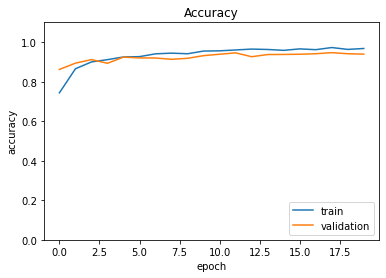

In [22]:
# summarize history for accuracy
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.ylim((0, 1.1))
plt.show()

Plot learning curves showing loss

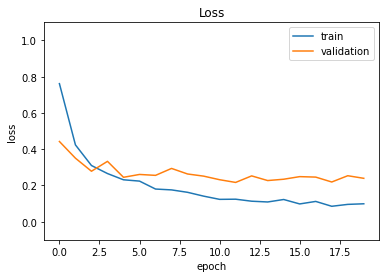

In [23]:
# summarize history for loss
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.ylim((-0.1, 1.1))
plt.show()

Evaluate the model

In [25]:
print("******** Training Data ********")
# Make a set of predictions for the training data
y_pred = model.predict(np.asfarray(X_train))
y_pred = np.argmax(y_pred,axis=1)

# Print performance details
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))



print("****** Validation Data ********")

# Make a set of predictions for the validation data
y_pred = model.predict(np.asfarray(X_valid))
y_pred = np.argmax(y_pred,axis=1)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

print("****** Test Data ********")

# Make a set of predictions for the validation data
y_pred = model.predict(np.asfarray(X_test))
y_pred = np.argmax(y_pred,axis=1)

# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

******** Training Data ********
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       520
           1       1.00      0.99      1.00       568
           2       1.00      0.99      0.99       450
           3       1.00      1.00      1.00       513
           4       0.99      0.85      0.92       466
           5       0.99      1.00      1.00       455
           6       1.00      0.96      0.98       479
           7       0.99      1.00      1.00       550
           8       0.97      1.00      0.99       496
           9       0.88      1.00      0.93       503

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,520,0,0,0,0,0,0,0,0,0,520
1,0,564,0,0,0,0,0,2,1,1,568
2,0,0,445,2,1,0,0,0,2,0,450
3,0,0,0,512,0,0,0,0,1,0,513
4,1,0,0,0,398,0,0,0,1,66,466
5,0,0,0,0,0,455,0,0,0,0,455
6,6,1,0,0,0,3,460,0,8,1,479
7,0,0,0,0,1,0,0,549,0,0,550
8,0,0,0,0,0,0,0,0,496,0,496


****** Validation Data ********
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       221
           1       0.97      0.94      0.95       222
           2       0.97      0.90      0.93       195
           3       0.92      0.92      0.92       201
           4       0.96      0.76      0.85       187
           5       0.92      0.88      0.90       190
           6       0.99      0.89      0.94       197
           7       0.96      0.96      0.96       203
           8       0.82      0.95      0.88       198
           9       0.74      0.97      0.84       177

    accuracy                           0.91      1991
   macro avg       0.92      0.91      0.91      1991
weighted avg       0.92      0.91      0.92      1991

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,216,0,0,0,0,0,0,0,3,2,221
1,0,208,1,4,0,0,0,2,4,3,222
2,2,1,175,4,2,1,0,1,6,3,195
3,0,1,1,184,0,3,1,0,8,3,201
4,1,0,1,0,142,1,0,0,4,38,187
5,3,1,0,4,0,168,0,2,5,7,190
6,4,0,0,0,0,7,175,0,11,0,197
7,1,1,1,0,1,1,0,194,1,3,203
8,0,1,0,3,2,1,0,2,188,1,198


****** Test Data ********
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       289
           1       0.99      0.97      0.98       355
           2       0.97      0.87      0.92       303
           3       0.95      0.93      0.94       303
           4       0.96      0.80      0.87       269
           5       0.93      0.92      0.92       286
           6       0.99      0.88      0.93       310
           7       0.97      0.95      0.96       299
           8       0.79      0.98      0.88       287
           9       0.81      0.95      0.87       299

    accuracy                           0.92      3000
   macro avg       0.93      0.92      0.92      3000
weighted avg       0.93      0.92      0.92      3000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,276,0,0,0,0,4,0,0,6,3,289
1,0,345,0,1,0,0,0,0,8,1,355
2,3,3,263,8,1,2,1,2,18,2,303
3,0,0,1,281,0,8,0,3,5,5,303
4,1,1,0,0,215,0,1,0,4,47,269
5,3,0,1,2,2,262,1,0,10,5,286
6,9,0,1,0,4,4,274,0,18,0,310
7,2,0,5,2,1,0,0,285,0,4,299
8,1,0,0,1,0,3,0,0,281,1,287


## Investigate Correct Predictions and Errors

Plot some of the examples that the model classified correctly.

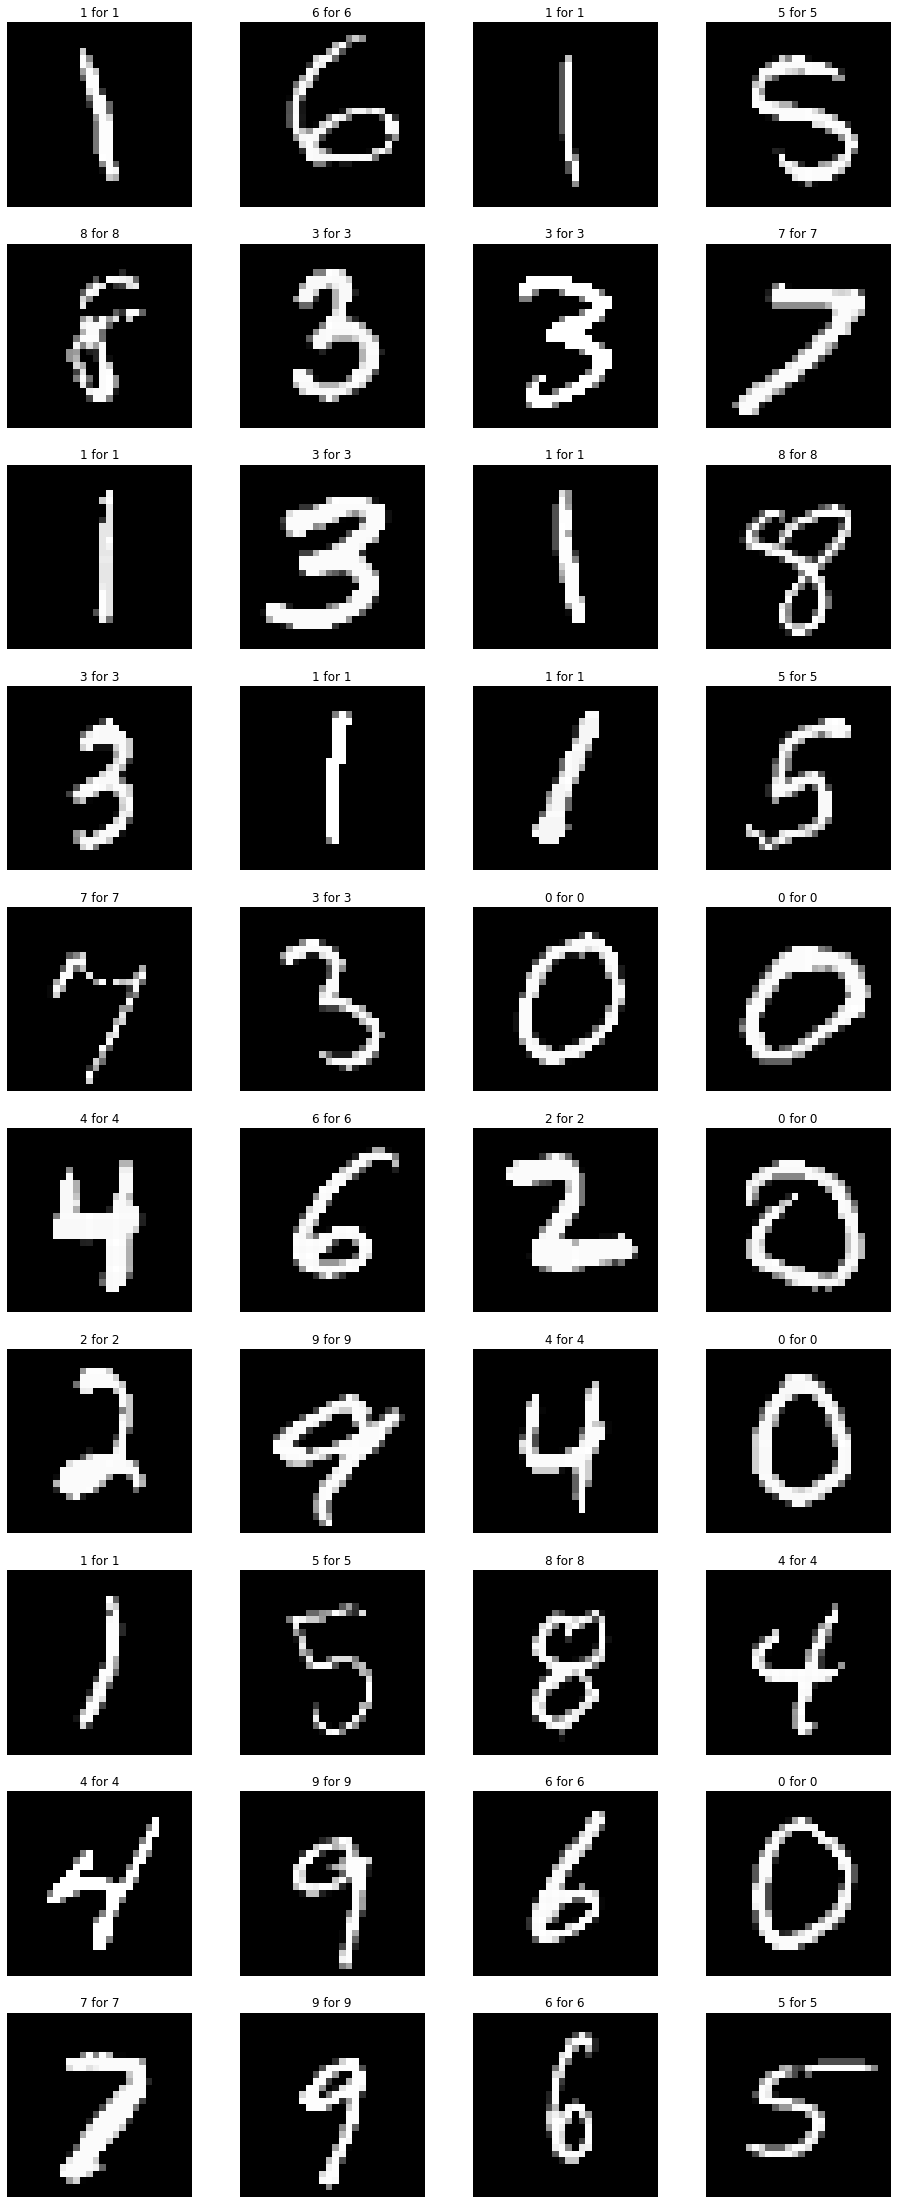

In [40]:
pltsize=4
row_images = 10
col_images = 4

maxtoshow = row_images * col_images
predictions = y_pred.reshape(-1)
corrects = predictions == y_test
ii = 0
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(X_test.shape[0]):
    if ii>=maxtoshow:
        break
    if corrects.iloc[i]:
        plt.subplot(row_images,col_images, ii+1)
        plt.axis('off')
        plt.imshow((X_test.iloc[i]*255).astype('int').values.reshape(28,28), cmap='gray', vmin=0, vmax=255)
        plt.title("{} for {}".format(predictions[i], y_test.iloc[i]))
        ii = ii + 1

Plot some of the examples that the model classified incorrectly.

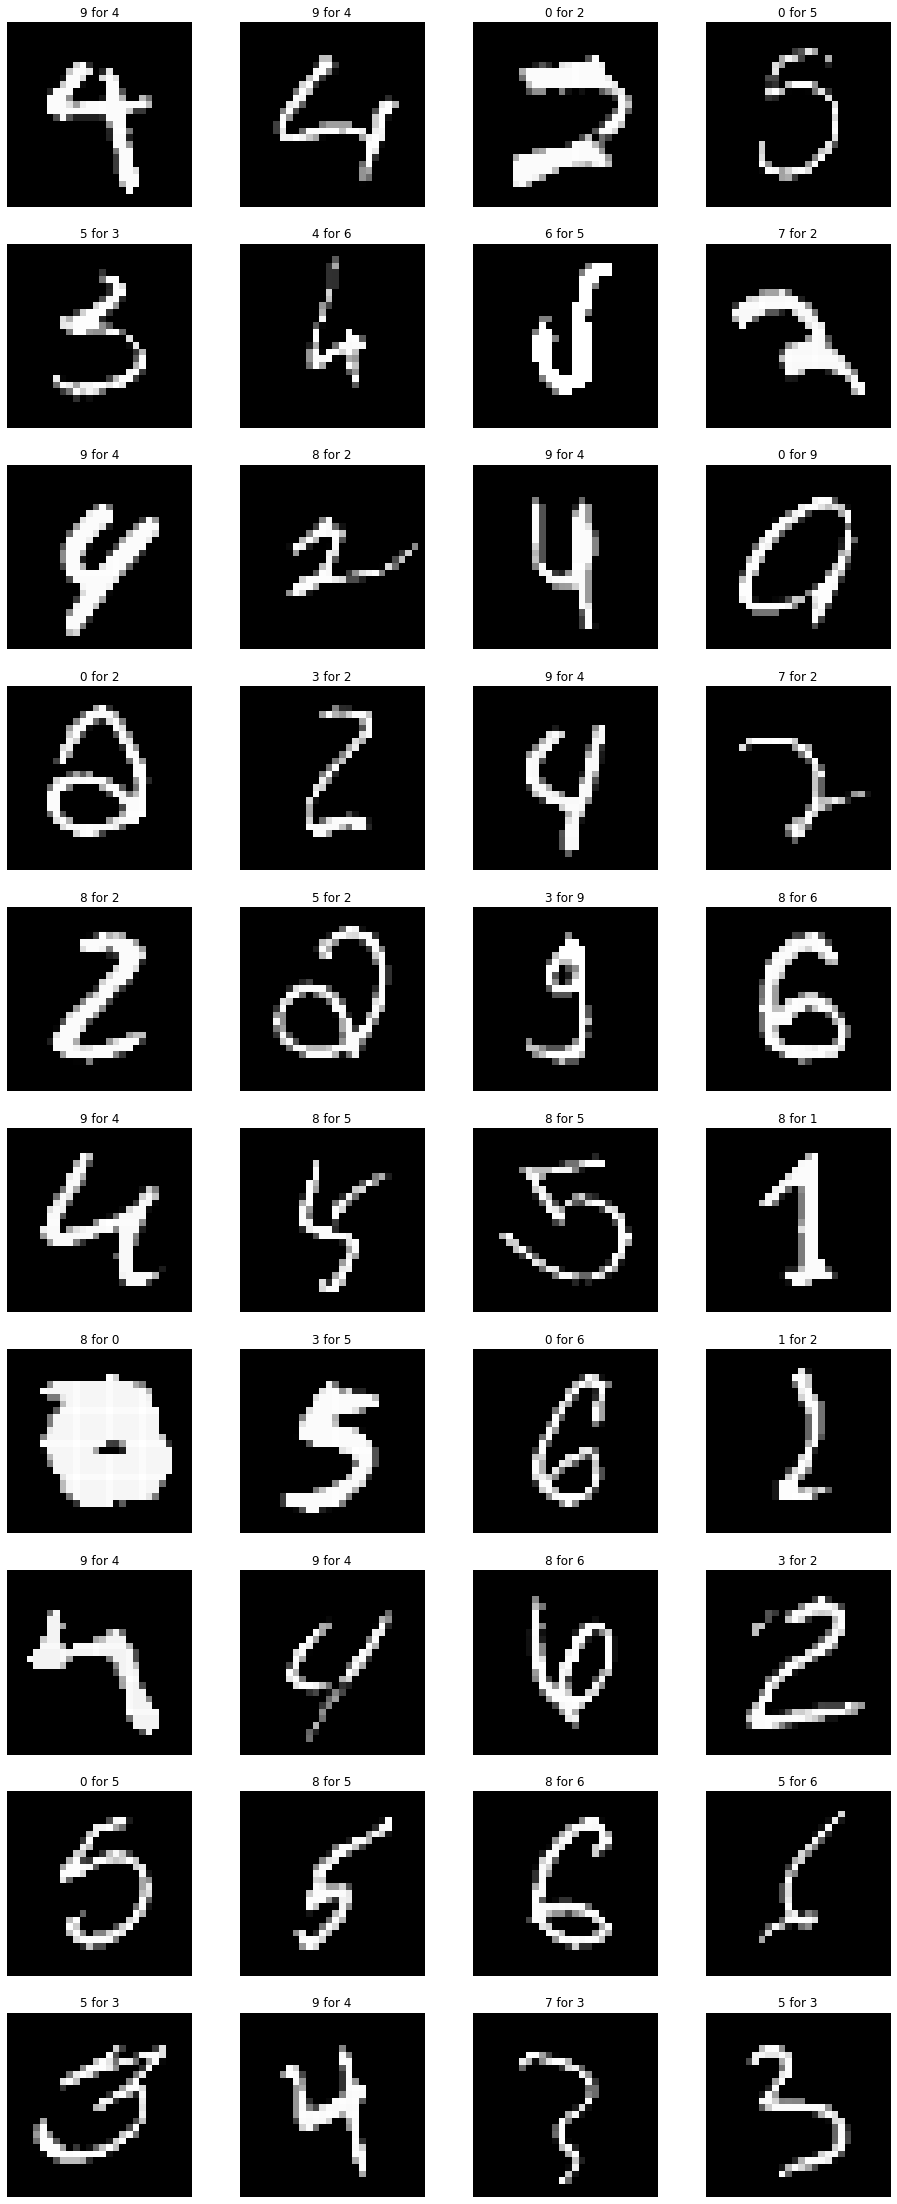

In [43]:
pltsize=4
row_images = 10
col_images = 4

maxtoshow = row_images * col_images
predictions = y_pred.reshape(-1)
errors = predictions != y_test
ii = 0
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(X_test.shape[0]):
    if ii>=maxtoshow:
        break
    if errors.iloc[i]:
        plt.subplot(row_images,col_images, ii+1)
        plt.axis('off')
        plt.imshow((X_test.iloc[i]*255).astype('int').values.reshape(28,28), cmap='gray', vmin=0, vmax=255)
        plt.title("{} for {}".format(predictions[i], y_test.iloc[i]))
        ii = ii + 1

## An Interactive Interface

Start an interactive version (using [gradio](https://gradio.app/))

In [31]:
def recognize_digit(image):
    image = image.reshape(1, 784)
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

im = gradio.inputs.Image(shape=(28, 28), 
                         image_mode='L', 
                         invert_colors=True, 
                         source="canvas")

iface = gr.Interface(
    recognize_digit, 
    im, 
    gradio.outputs.Label(num_top_classes=3),
    live=True,
    interpretation="default",
    capture_session=True,
)

iface.test_launch()

Test launch: recognize_digit()... PASSED


In [32]:
iface.launch()

IMPORTANT: You are using gradio version 2.4.6, however version 2.5.1 is available, please upgrade.
--------
Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7860/', None)